# Project Description:-

Q. Find publicly available data for key factors that influence US home prices nationally. Then,
build a data science model that explains how these factors impacted home prices over the last 20
years. 
Use the S&P Case-Schiller Home Price Index as a proxy for home prices:

fred.stlouisfed.org/series/CSUSHPISA 


In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset

df=pd.read_excel(r'C:\Users\arunk\OneDrive\Desktop\FinalData.xlsx')

In [3]:
df

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions),HOME PRICES
0,2003,11456.28,5.9,5.83,291109820,0.96,71.21,1.13,2.27,65860,6.02,133.73
1,2004,12217.19,5.5,5.84,293947885,0.97,71.22,1.35,2.68,65760,6.71,150.44
2,2005,13038.94,5.0,5.87,296842670,0.98,71.52,3.21,3.39,66780,7.08,171.73
3,2006,13815.58,4.6,6.41,299753098,0.98,71.98,4.96,3.23,67520,6.52,183.44
4,2007,14474.22,4.6,6.34,302743399,1.00,71.77,5.02,2.85,68610,5.02,179.91
5,2008,14764.22,5.8,6.03,305694910,0.97,70.86,1.93,3.84,66280,4.12,164.05
6,2009,14477.59,9.2,5.41,308512035,0.92,67.60,0.16,-0.36,65850,4.34,148.54
7,2010,15048.53,9.6,4.69,311182845,0.87,66.67,0.18,1.64,64300,4.18,144.67
8,2011,15599.25,8.9,4.45,313876608,0.86,66.62,0.11,3.16,63350,4.26,139.25
9,2012,16253.37,8.0,3.66,316651321,0.87,67.11,0.14,2.07,63350,4.66,140.99


#### Columns

1) YEAR = from year 2003 to 2023.

2) GDP(Billions) = GDP(gross domestic product) of US in billions. It  the standard measure of the value added created through the production of goods and services in a country during a certain period. Took the data of US GDP from https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product , https://fred.stlouisfed.org/series/GDP

3) UNEMPLOYMENT RATE(%) = Unemployment rate of the US. It the percentage of people in the labour force who are unemployed. Took the data for the US unemployment rate from https://data.bls.gov/pdq/SurveyOutputServlet

4) MORTGAGE RATES(Avg. %) = Mortgage rate is a part of what it costs to borrow money from a lender. Took the data of the US Mortgage rates from https://www.bankrate.com/mortgages/historical-mortgage-rates/#current-rates , https://fred.stlouisfed.org/series/MORTGAGE30US

5) POPULATION = No. of people live in the US yearwise. Took the data of the year wise population of the US from https://www.macrotrends.net/countries/USA/united-states/population

6) POPULATION GROWTH(%) = Percentage wise growth rate of the population growth in the US. Took the data from https://www.macrotrends.net/countries/USA/united-states/population

7) EMPLOYMENT RATE(Aged:-15-64(%)) = The employment rate is the percentage of employed persons in relation to the comparable total population.. Took the data of the employement rate from https://fred.stlouisfed.org/series/LREM64TTUSM156S#0

8) FEDERAL FUNDS RATE(%) = Federal funds rate  is the interest rate that U.S. banks pay one another to borrow or loan money overnight. took the data from https://fred.stlouisfed.org/series/FEDFUNDS#0

9) INFLATION RATE (%) = Inflation is the rate of increase in prices over a given period of time. Took the data of the inflation rate in the US from https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi

10) HOUSEHOLD INCOME =  household income refers to the combined gross income of all members of a household above a specified age. Took the data from https://fred.stlouisfed.org/series/MEHOINUSA672N

11) NO. OF EXISTING HOUSE SOLD(Millions) = This columns shows us the amount of existing houses sold in the US. Took the data from https://www.mortgagenewsdaily.com/data/existing-home-sales

12) HOME PRICES = This is our Target Variable. the website to retrieve this data is provided in the question itself. the link of the site is https://fred.stlouisfed.org/series/CSUSHPISA

###### NOTE:- 
While collecting the data, some columns had data on monthly basis, some had data quaterly and some had on anual interval. For e.g:- data of population was present of every month from january 2003 to nov 2023, so we took an avg of every year and converted the whole data on anual interval basis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   YEAR                                  21 non-null     int64  
 1   GDP(Billions)                         21 non-null     float64
 2   UNEMPLOYEMENT RATE(%)                 21 non-null     float64
 3   MORTGAGE RATES(Avg. %)                21 non-null     float64
 4   POPULATION                            21 non-null     int64  
 5   POPULATION GROWTH(%)                  21 non-null     float64
 6   EMPLOYMENT RATE(Aged:-15-64(%))       21 non-null     float64
 7   FEDERAL FUNDS RATE(%)                 21 non-null     float64
 8   INFLATION RATE (%)                    21 non-null     float64
 9   HOUSEHOLD INCOME                      21 non-null     int64  
 10  NO. OF EXISTING HOUSE SOLD(Millions)  21 non-null     float64
 11  HOME PRICES          

There are no null values present.
There are 21 rows and 12 columns present.
All the columns have numerical values present in them.
HOME PRICES is our target variable.


In [5]:
df.dtypes

YEAR                                      int64
GDP(Billions)                           float64
UNEMPLOYEMENT RATE(%)                   float64
MORTGAGE RATES(Avg. %)                  float64
POPULATION                                int64
POPULATION GROWTH(%)                    float64
EMPLOYMENT RATE(Aged:-15-64(%))         float64
FEDERAL FUNDS RATE(%)                   float64
INFLATION RATE (%)                      float64
HOUSEHOLD INCOME                          int64
NO. OF EXISTING HOUSE SOLD(Millions)    float64
HOME PRICES                             float64
dtype: object

In [6]:
df.describe()

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions),HOME PRICES
count,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2013.000000,17721.118095,5.861905,4.850952,3.181437e+08,0.788095,69.071429,1.470476,2.560476,69220.476190,5.366190,186.944286
std,6.204837,4324.926249,1.915849,1.099245,1.573458e+07,0.206122,2.706604,1.687615,1.764187,4762.491445,0.833939,49.943919
min,2003.000000,11456.280000,3.600000,3.110000,2.911098e+08,0.310000,60.560000,0.080000,-0.360000,63350.000000,4.120000,133.730000
25%,2008.000000,14477.590000,4.600000,3.960000,3.056949e+08,0.710000,67.340000,0.140000,1.620000,65760.000000,4.940000,150.440000
50%,2013.000000,16880.510000,5.300000,4.540000,3.193752e+08,0.860000,69.420000,1.010000,2.270000,67520.000000,5.340000,172.780000
75%,2018.000000,20653.830000,7.300000,5.840000,3.321400e+08,0.960000,71.220000,1.930000,3.230000,73030.000000,6.020000,202.470000
max,2023.000000,26828.770000,9.600000,6.810000,3.399966e+08,1.000000,71.980000,5.020000,8.010000,78250.000000,7.080000,312.180000


From above details we can notice the following-

.As count for every colums is 1470 we can confirm that there are no null values.

.Mean,Median and Standard deviation for every column

.There may be some skewness present in some columns as median(50%) values and mean values are somewhat different

.There may be some outliers present as 75% values and max values are far off in some columns

In [7]:
df.nunique()

YEAR                                    21
GDP(Billions)                           21
UNEMPLOYEMENT RATE(%)                   17
MORTGAGE RATES(Avg. %)                  21
POPULATION                              21
POPULATION GROWTH(%)                    17
EMPLOYMENT RATE(Aged:-15-64(%))         21
FEDERAL FUNDS RATE(%)                   20
INFLATION RATE (%)                      21
HOUSEHOLD INCOME                        20
NO. OF EXISTING HOUSE SOLD(Millions)    20
HOME PRICES                             21
dtype: int64

# Visualisation

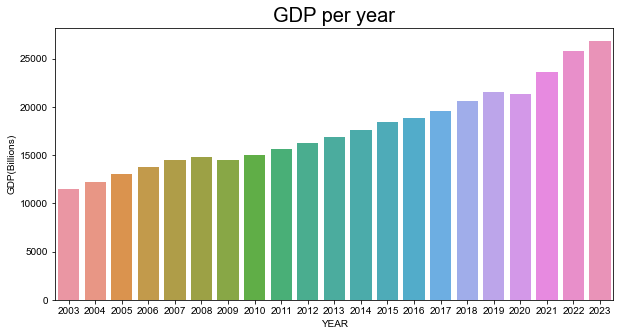

In [8]:
fig = plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='YEAR',y='GDP(Billions)')
sns.set(style='dark')
plt.title('GDP per year',fontsize=20)
plt.show()

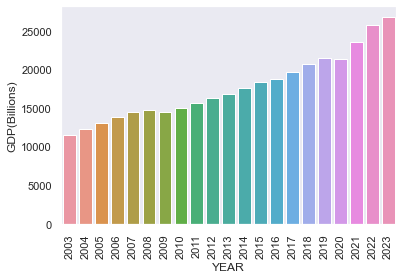

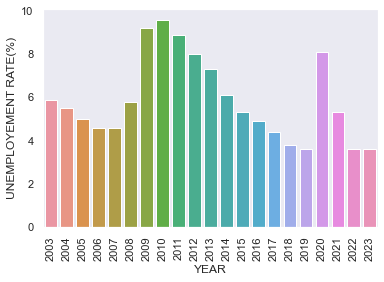

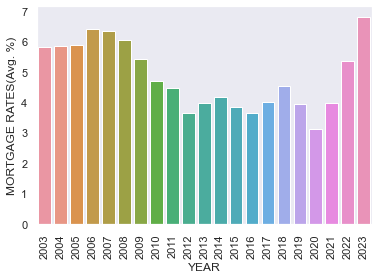

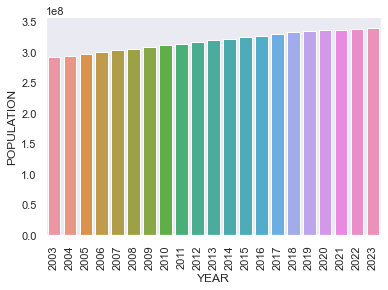

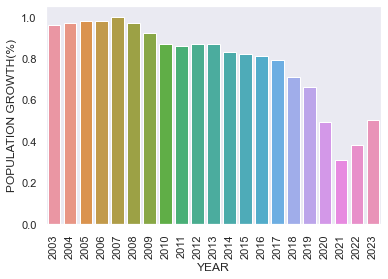

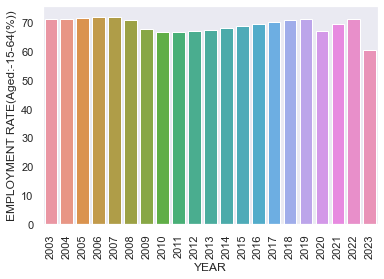

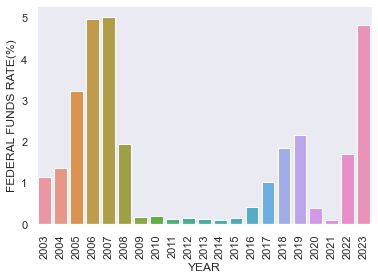

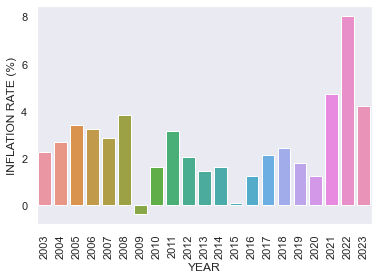

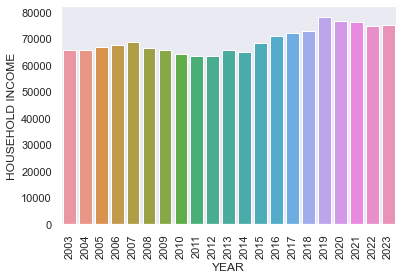

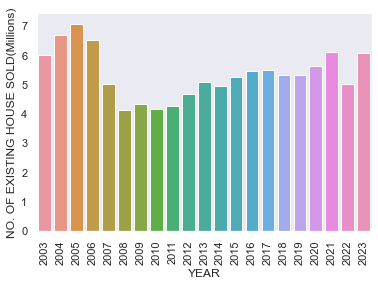

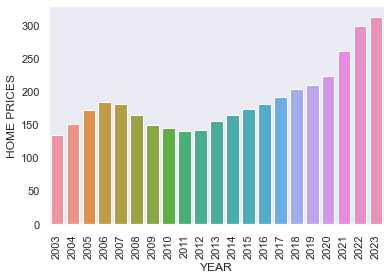

In [9]:
for a in df:
    if a!='YEAR':
        sns.barplot(data=df,x='YEAR',y=a)
        plt.xticks(rotation=90)
        plt.show()

1)There is a gradual increase in the GDP of the US.

2)Unemployment rate was the highest in the year 2010.

3)Mortgage rate is the highest in the year 2023.

4)There is a steady increase in the population of the US.

5)Population growth is the lowest in the year 2021

6)Employement rate is tthe lowest in the year 2023

7)Federal funds rates was the lowest in the year 2014

8)Inflation rate negative in the year 2009

9)Household income was the maximum in the year 2019

10)Lowest no. of existing house were sold in the year 2008

11)Home prices were the lowest in the year 2003 and highest in the year 2023

<AxesSubplot:>

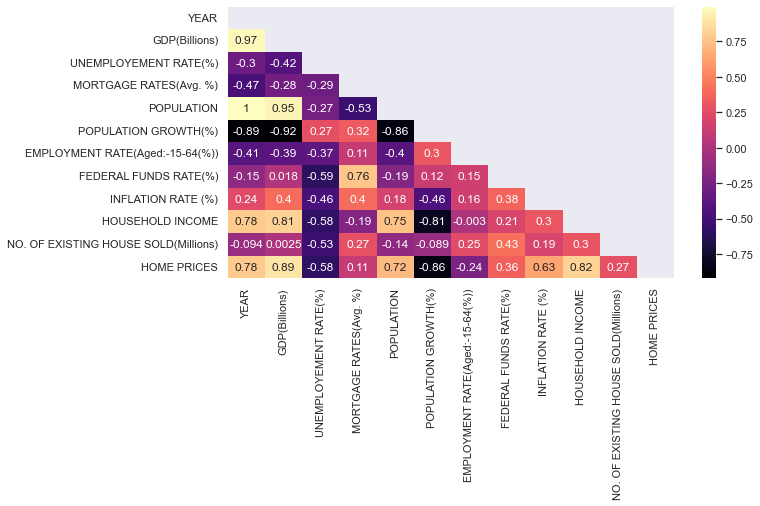

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),cmap='magma',annot=True)

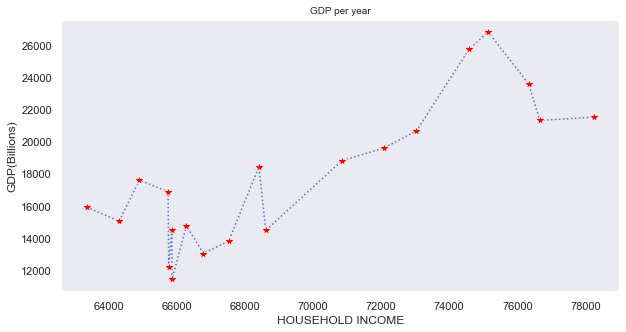

In [11]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(data=df,x='HOUSEHOLD INCOME',y='GDP(Billions)',linestyle='dotted', marker='*',markersize=10,markerfacecolor='red')
sns.set(style='dark')
plt.title('GDP per year',fontsize=10)
plt.show()

we ccan observe that with the increase in the household income, the gdp of  the nation also increases.

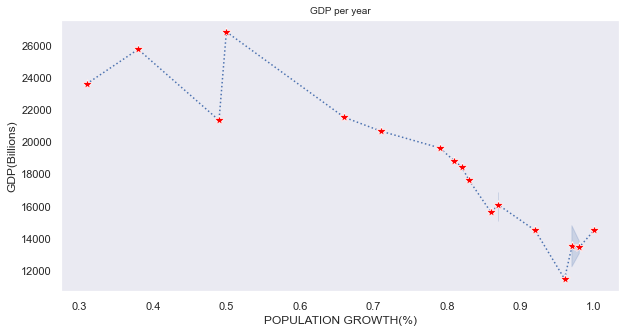

In [12]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(data=df,x='POPULATION GROWTH(%)',y='GDP(Billions)',linestyle='dotted', marker='*',markersize=10,markerfacecolor='red')
sns.set(style='dark')
plt.title('GDP per year',fontsize=10)
plt.show()

GDP of the nation decreases with increase in the population growth. Both are negatively correlated to each other.

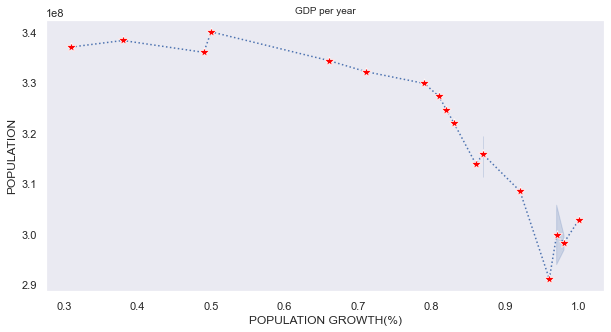

In [13]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(data=df,x='POPULATION GROWTH(%)',y='POPULATION',linestyle='dotted', marker='*',markersize=10,markerfacecolor='red')
sns.set(style='dark')
plt.title('GDP per year',fontsize=10)
plt.show()

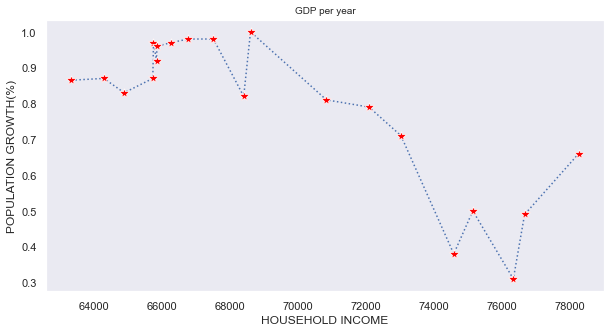

In [14]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(data=df,x='HOUSEHOLD INCOME',y='POPULATION GROWTH(%)',linestyle='dotted', marker='*',markersize=10,markerfacecolor='red')
sns.set(style='dark')
plt.title('GDP per year',fontsize=10)
plt.show()

# Now we will check for the outliers.

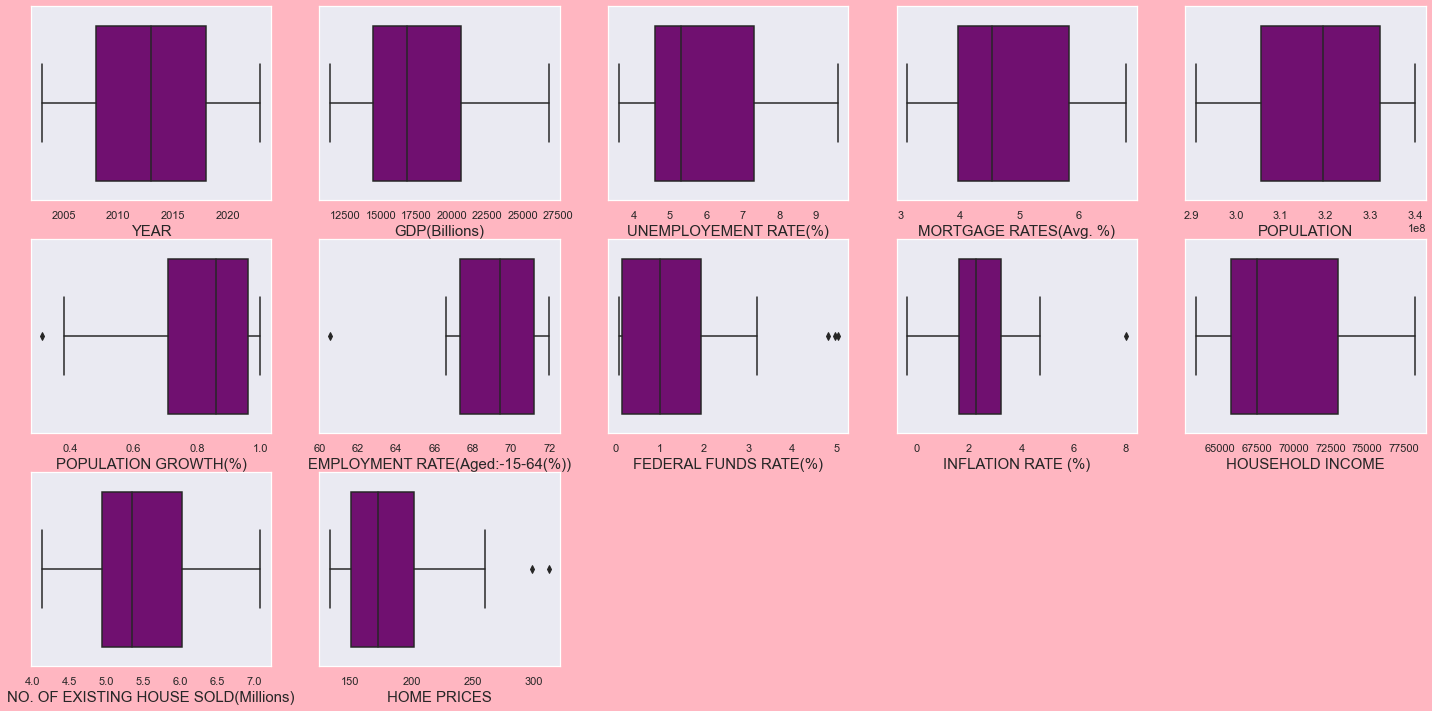

In [15]:
plt.figure(figsize=(25,25),facecolor='lightpink')
p=1
for c in df:
    if p<=12:
        ax=plt.subplot(6,5,p)
        sns.boxplot(df[c],color='purple')
        plt.xlabel(c,fontsize=15)
    p+=1

We can observe that there are  outliers present in the dataset. so we will remove them using zscore method.

In [16]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(21, 12)

In [17]:
threshold=3
print(np.where(z>3))

(array([19, 20], dtype=int64), array([8, 6], dtype=int64))


In [18]:
 df1=df[(z<3).all(axis=1)]
df1

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions),HOME PRICES
0,2003,11456.28,5.9,5.83,291109820,0.96,71.21,1.13,2.27,65860,6.02,133.73
1,2004,12217.19,5.5,5.84,293947885,0.97,71.22,1.35,2.68,65760,6.71,150.44
2,2005,13038.94,5.0,5.87,296842670,0.98,71.52,3.21,3.39,66780,7.08,171.73
3,2006,13815.58,4.6,6.41,299753098,0.98,71.98,4.96,3.23,67520,6.52,183.44
4,2007,14474.22,4.6,6.34,302743399,1.00,71.77,5.02,2.85,68610,5.02,179.91
5,2008,14764.22,5.8,6.03,305694910,0.97,70.86,1.93,3.84,66280,4.12,164.05
6,2009,14477.59,9.2,5.41,308512035,0.92,67.60,0.16,-0.36,65850,4.34,148.54
7,2010,15048.53,9.6,4.69,311182845,0.87,66.67,0.18,1.64,64300,4.18,144.67
8,2011,15599.25,8.9,4.45,313876608,0.86,66.62,0.11,3.16,63350,4.26,139.25
9,2012,16253.37,8.0,3.66,316651321,0.87,67.11,0.14,2.07,63350,4.66,140.99


In [19]:
df1.shape

(19, 12)

In [20]:
df.shape

(21, 12)

In [21]:
# data loss

(21-19)/21*100

9.523809523809524

In [22]:
# 9.5% of the data loss.

In [23]:
df1.skew()

YEAR                                    0.000000
GDP(Billions)                           0.342420
UNEMPLOYEMENT RATE(%)                   0.653231
MORTGAGE RATES(Avg. %)                  0.360000
POPULATION                             -0.154440
POPULATION GROWTH(%)                   -1.711627
EMPLOYMENT RATE(Aged:-15-64(%))        -0.174289
FEDERAL FUNDS RATE(%)                   1.505973
INFLATION RATE (%)                     -0.100349
HOUSEHOLD INCOME                        0.927416
NO. OF EXISTING HOUSE SOLD(Millions)    0.388169
HOME PRICES                             1.081161
dtype: float64

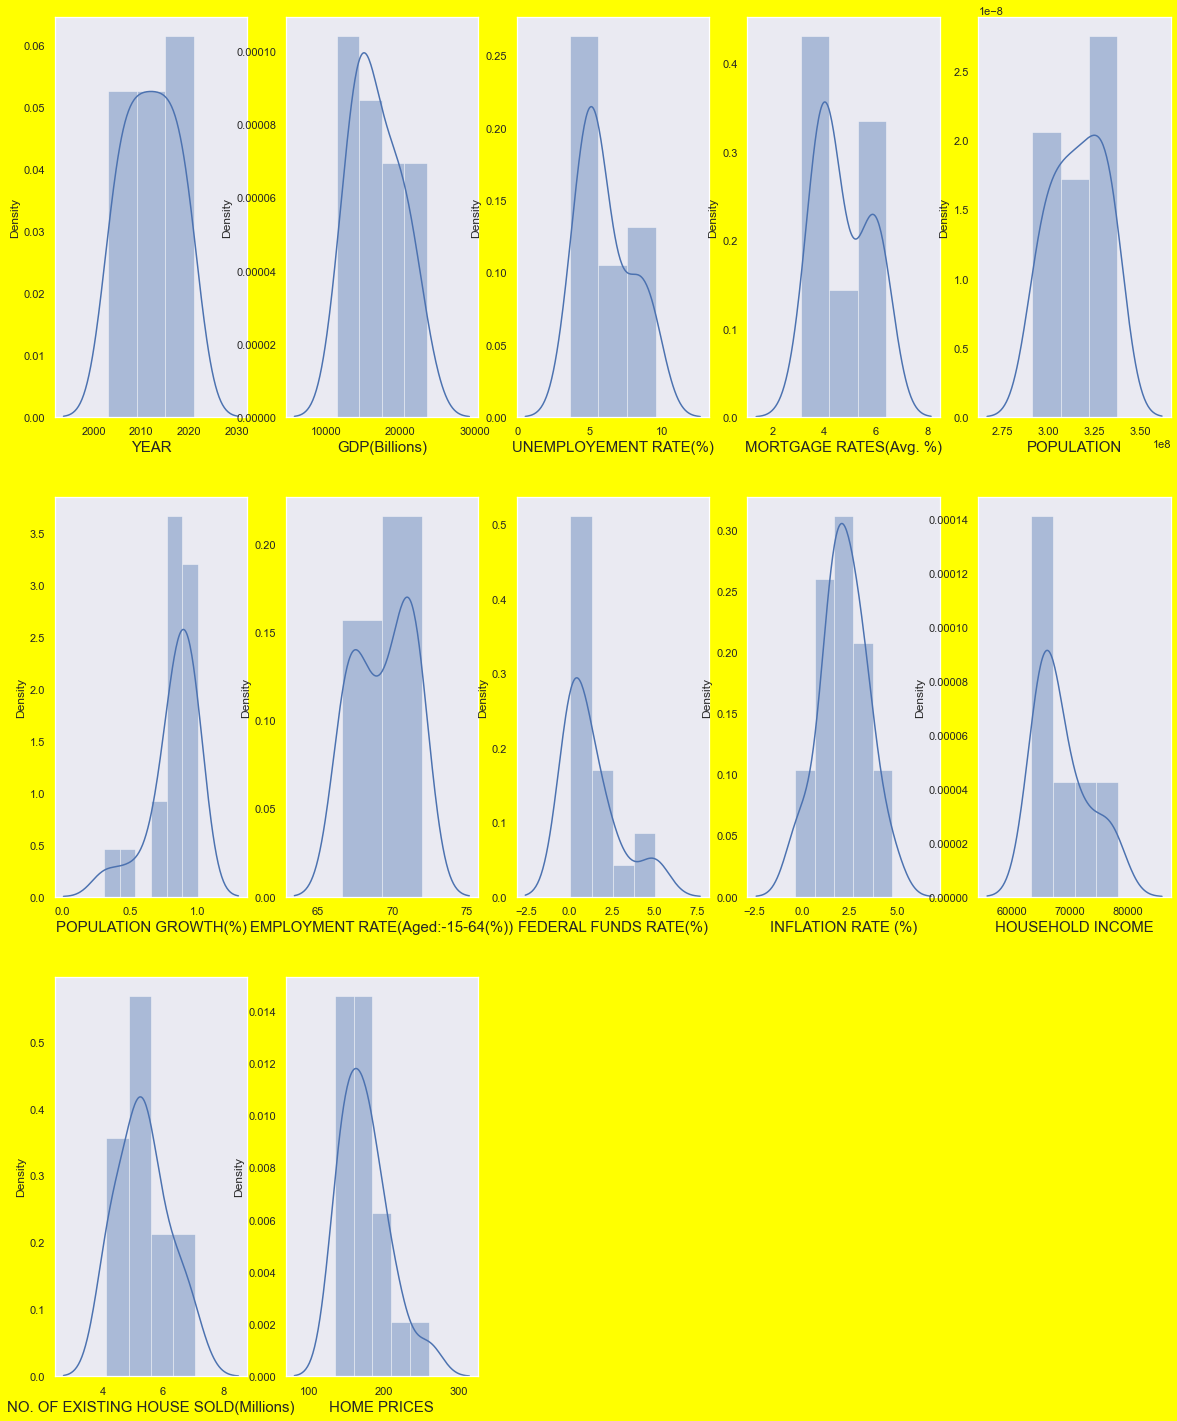

In [24]:
plt.figure(figsize=(20,25),facecolor='Yellow')
pltno=1

for c in df1:
    if pltno<=15:
        ax=plt.subplot(3,5,pltno)
        sns.distplot(df1[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [25]:
# First let's seperate the target variable

In [26]:
x=df1.drop(columns=['HOME PRICES'])


In [27]:
y=df1['HOME PRICES']

In [28]:
x

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions)
0,2003,11456.28,5.9,5.83,291109820,0.96,71.21,1.13,2.27,65860,6.02
1,2004,12217.19,5.5,5.84,293947885,0.97,71.22,1.35,2.68,65760,6.71
2,2005,13038.94,5.0,5.87,296842670,0.98,71.52,3.21,3.39,66780,7.08
3,2006,13815.58,4.6,6.41,299753098,0.98,71.98,4.96,3.23,67520,6.52
4,2007,14474.22,4.6,6.34,302743399,1.00,71.77,5.02,2.85,68610,5.02
5,2008,14764.22,5.8,6.03,305694910,0.97,70.86,1.93,3.84,66280,4.12
6,2009,14477.59,9.2,5.41,308512035,0.92,67.60,0.16,-0.36,65850,4.34
7,2010,15048.53,9.6,4.69,311182845,0.87,66.67,0.18,1.64,64300,4.18
8,2011,15599.25,8.9,4.45,313876608,0.86,66.62,0.11,3.16,63350,4.26
9,2012,16253.37,8.0,3.66,316651321,0.87,67.11,0.14,2.07,63350,4.66


In [29]:
y

0     133.73
1     150.44
2     171.73
3     183.44
4     179.91
5     164.05
6     148.54
7     144.67
8     139.25
9     140.99
10    154.52
11    164.69
12    172.78
13    180.92
14    191.39
15    202.47
16    209.47
17    222.14
18    260.04
Name: HOME PRICES, dtype: float64

In [30]:
x.skew()

YEAR                                    0.000000
GDP(Billions)                           0.342420
UNEMPLOYEMENT RATE(%)                   0.653231
MORTGAGE RATES(Avg. %)                  0.360000
POPULATION                             -0.154440
POPULATION GROWTH(%)                   -1.711627
EMPLOYMENT RATE(Aged:-15-64(%))        -0.174289
FEDERAL FUNDS RATE(%)                   1.505973
INFLATION RATE (%)                     -0.100349
HOUSEHOLD INCOME                        0.927416
NO. OF EXISTING HOUSE SOLD(Millions)    0.388169
dtype: float64

In [31]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')
s=['FEDERAL FUNDS RATE(%)','POPULATION GROWTH(%)']
x[s] = yj.fit_transform(x[s].values)


In [32]:
x.skew()

YEAR                                    0.000000
GDP(Billions)                           0.342420
UNEMPLOYEMENT RATE(%)                   0.653231
MORTGAGE RATES(Avg. %)                  0.360000
POPULATION                             -0.154440
POPULATION GROWTH(%)                   -0.338512
EMPLOYMENT RATE(Aged:-15-64(%))        -0.174289
FEDERAL FUNDS RATE(%)                   0.303510
INFLATION RATE (%)                     -0.100349
HOUSEHOLD INCOME                        0.927416
NO. OF EXISTING HOUSE SOLD(Millions)    0.388169
dtype: float64

# Standard Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-1.64316767e+00, -1.60806024e+00, -1.10626965e-01,
         1.08598685e+00, -1.71614701e+00,  9.67236965e-01,
         9.60368565e-01,  4.67045558e-01,  6.95319228e-02,
        -6.16123700e-01,  8.04770908e-01],
       [-1.46059349e+00, -1.37991803e+00, -3.31880894e-01,
         1.09578911e+00, -1.51993998e+00,  1.08894127e+00,
         9.65686841e-01,  6.27405461e-01,  4.12350707e-01,
        -6.38391819e-01,  1.62967682e+00],
       [-1.27801930e+00, -1.13353428e+00, -6.08448305e-01,
         1.12519588e+00, -1.31981166e+00,  1.21478396e+00,
         1.12523510e+00,  1.33444822e+00,  1.00601250e+00,
        -4.11257003e-01,  2.07201767e+00],
       [-1.09544512e+00, -9.00675768e-01, -8.29702234e-01,
         1.65451773e+00, -1.11860188e+00,  1.21478396e+00,
         1.36987577e+00,  1.60922629e+00,  8.72229563e-01,
        -2.46472920e-01,  1.40252882e+00],
       [-9.12870929e-01, -7.03196978e-01, -8.29702234e-01,
         1.58590194e+00, -9.11870155e-01,  1.47936223e+00,
  

In [34]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [35]:
xx

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions)
0,-1.643168,-1.608060,-1.106270e-01,1.085987,-1.716147,0.967237,0.960369,0.467046,0.069532,-0.616124,0.804771
1,-1.460593,-1.379918,-3.318809e-01,1.095789,-1.519940,1.088941,0.965687,0.627405,0.412351,-0.638392,1.629677
2,-1.278019,-1.133534,-6.084483e-01,1.125196,-1.319812,1.214784,1.125235,1.334448,1.006013,-0.411257,2.072018
3,-1.095445,-0.900676,-8.297022e-01,1.654518,-1.118602,1.214784,1.369876,1.609226,0.872230,-0.246473,1.402529
4,-0.912871,-0.703197,-8.297022e-01,1.585902,-0.911870,1.479362,1.258192,1.615935,0.554495,-0.003750,-0.390745
5,-0.730297,-0.616247,-1.659404e-01,1.282032,-0.707820,1.088941,0.774229,0.939405,1.382277,-0.522598,-1.466709
6,-0.547723,-0.702187,1.714718e+00,0.674292,-0.513061,0.519523,-0.959529,-0.913656,-2.129525,-0.618351,-1.203696
7,-0.365148,-0.531003,1.935972e+00,-0.031470,-0.328417,0.039846,-1.454128,-0.863570,-0.457238,-0.963506,-1.394978
8,-0.182574,-0.365881,1.548778e+00,-0.266725,-0.142186,-0.046428,-1.480720,-1.046376,0.813700,-1.175053,-1.299337
9,0.000000,-0.169758,1.050956e+00,-1.041103,0.049641,0.039846,-1.220124,-0.965414,-0.097697,-1.175053,-0.821131


 now we will check the vif values.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [37]:
vif

,Vif values,features
0,16665.313933,YEAR
1,844.155495,GDP(Billions)
2,104.124600,UNEMPLOYEMENT RATE(%)
3,25.455712,MORTGAGE RATES(Avg. %)
4,10249.273192,POPULATION
5,49.590747,POPULATION GROWTH(%)
6,194.828771,EMPLOYMENT RATE(Aged:-15-64(%))
7,26.771336,FEDERAL FUNDS RATE(%)
8,7.717850,INFLATION RATE (%)
9,79.494869,HOUSEHOLD INCOME


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
xx = pd.DataFrame(pca.fit_transform(xx), columns=xx.columns)
xx

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions)
0,-3.390202,0.078605,-0.367178,-0.662876,0.120337,0.253906,0.593331,0.155956,-0.038005,0.005726,-0.007023
1,-3.400867,-0.542320,-0.167024,-1.220495,-0.013200,0.079184,0.130961,0.051636,0.008790,0.013197,-0.000776
2,-3.516674,-1.492028,0.171683,-1.220598,0.086982,-0.365869,-0.192637,-0.041794,0.024897,-0.006594,0.006396
3,-3.482156,-1.733404,0.030420,-0.300872,0.182863,-0.051167,-0.396366,0.061509,0.017024,-0.003450,0.003320
4,-2.993795,-1.126584,-0.138413,1.349215,0.158244,0.027840,-0.119568,-0.291178,-0.081770,-0.051269,-0.005691
5,-2.319617,-0.056116,1.108289,1.853517,-0.058723,0.056423,0.131845,-0.117448,0.044734,0.023696,-0.003748
6,-0.367257,3.096414,-1.330719,0.384637,0.832275,0.678942,-0.200212,-0.014969,0.078921,0.033401,0.000336
7,0.151716,3.091770,0.421568,0.324543,0.563574,-0.072778,0.021678,0.168119,-0.002079,-0.022605,0.008490
8,0.298244,2.631929,1.594830,0.224184,-0.030675,-0.213059,0.047886,0.093098,-0.098217,0.035575,0.007037
9,0.749577,2.281250,0.518025,-0.160237,-0.531146,-0.570064,0.132688,-0.037442,0.128387,-0.062818,-0.005783


In [39]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

vif

,Vif values,features
0,1.0,YEAR
1,1.0,GDP(Billions)
2,1.0,UNEMPLOYEMENT RATE(%)
3,1.0,MORTGAGE RATES(Avg. %)
4,1.0,POPULATION
5,1.0,POPULATION GROWTH(%)
6,1.0,EMPLOYMENT RATE(Aged:-15-64(%))
7,1.0,FEDERAL FUNDS RATE(%)
8,1.0,INFLATION RATE (%)
9,1.0,HOUSEHOLD INCOME


In [40]:
# Now the VIF values of all the features are  under 10.

In [41]:
xx

,YEAR,GDP(Billions),UNEMPLOYEMENT RATE(%),MORTGAGE RATES(Avg. %),POPULATION,POPULATION GROWTH(%),EMPLOYMENT RATE(Aged:-15-64(%)),FEDERAL FUNDS RATE(%),INFLATION RATE (%),HOUSEHOLD INCOME,NO. OF EXISTING HOUSE SOLD(Millions)
0,-3.390202,0.078605,-0.367178,-0.662876,0.120337,0.253906,0.593331,0.155956,-0.038005,0.005726,-0.007023
1,-3.400867,-0.542320,-0.167024,-1.220495,-0.013200,0.079184,0.130961,0.051636,0.008790,0.013197,-0.000776
2,-3.516674,-1.492028,0.171683,-1.220598,0.086982,-0.365869,-0.192637,-0.041794,0.024897,-0.006594,0.006396
3,-3.482156,-1.733404,0.030420,-0.300872,0.182863,-0.051167,-0.396366,0.061509,0.017024,-0.003450,0.003320
4,-2.993795,-1.126584,-0.138413,1.349215,0.158244,0.027840,-0.119568,-0.291178,-0.081770,-0.051269,-0.005691
5,-2.319617,-0.056116,1.108289,1.853517,-0.058723,0.056423,0.131845,-0.117448,0.044734,0.023696,-0.003748
6,-0.367257,3.096414,-1.330719,0.384637,0.832275,0.678942,-0.200212,-0.014969,0.078921,0.033401,0.000336
7,0.151716,3.091770,0.421568,0.324543,0.563574,-0.072778,0.021678,0.168119,-0.002079,-0.022605,0.008490
8,0.298244,2.631929,1.594830,0.224184,-0.030675,-0.213059,0.047886,0.093098,-0.098217,0.035575,0.007037
9,0.749577,2.281250,0.518025,-0.160237,-0.531146,-0.570064,0.132688,-0.037442,0.128387,-0.062818,-0.005783


In [42]:
y

0     133.73
1     150.44
2     171.73
3     183.44
4     179.91
5     164.05
6     148.54
7     144.67
8     139.25
9     140.99
10    154.52
11    164.69
12    172.78
13    180.92
14    191.39
15    202.47
16    209.47
17    222.14
18    260.04
Name: HOME PRICES, dtype: float64

Reggression model will be build for this target variable.

# Model Building.

In [43]:
# importing thee necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

In [45]:
maxAcc = 0
maxRS = 0

for i in range(1,60):
    xtrain,xtest,ytrain,ytest = train_test_split(xx,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9662784951744071 on Random State: 3


Best random state is 3

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,test_size=0.25,random_state=3)

In [47]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.9662784951744071
Mean absolute error:  2.853128564865
Mean squared error:  12.232099003945873


In [48]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(xtrain, ytrain)
rpred = r.predict(xtest)
print(r2_score(ytest, rpred))
print("Mean absolute error: ", mean_absolute_error(ytest,rpred))
print("Mean squared error: ", mean_squared_error(ytest,rpred))

-0.05764661747372779
Mean absolute error:  15.52225999999995
Mean squared error:  383.64949022999787


In [49]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dpred = dt.predict(xtest)
print(r2_score(ytest, dpred))
print("Mean absolute error: ", mean_absolute_error(ytest,dpred))
print("Mean squared error: ", mean_squared_error(ytest,dpred))

-0.48251349020197454
Mean absolute error:  19.651999999999997
Mean squared error:  537.7651999999998


In [50]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(xtrain,ytrain)
apred=a.predict(xtest)
print(r2_score(ytest, apred))
print("Mean absolute error: ", mean_absolute_error(ytest,apred))
print("Mean squared error: ", mean_squared_error(ytest,apred))

0.19379765070614907
Mean absolute error:  14.857866666666661
Mean squared error:  292.44089208888875


In [51]:
# XGBOOST REGRESSOR

xgb= XGBRegressor()
xgb.fit(xtrain, ytrain)
xpred = xgb.predict(xtest)
print(r2_score(ytest, xpred))
print("Mean absolute error: ", mean_absolute_error(ytest,xpred))
print("Mean squared error: ", mean_squared_error(ytest,xpred))

0.6501022376871796
Mean absolute error:  9.022638793945315
Mean squared error:  126.92150282158403


# CrossValidation Score.

In [52]:
from sklearn.model_selection import cross_val_score
# Linear Regression

s=cross_val_score(lr,xx,y,scoring='explained_variance')
print(s)
print(s.mean())

[ -0.05967312   0.5273467    0.64003106  -0.03885855 -11.13240147]
-2.012711077044717


In [53]:
# RandomForest Regressor

s=cross_val_score(r,xx,y,scoring='explained_variance')
print(s)
print(s.mean())

[ 0.29497167  0.60563352 -0.31724475  0.6802613  -0.11033786]
0.2306567759844786


In [54]:
# DecisionTree Regressor

s=cross_val_score(dt,xx,y,scoring='explained_variance')
print(s)
print(s.mean())

[ 0.58521207  0.48686116 -5.46577885  0.84136669  0.43136924]
-0.6241939402377545


In [55]:
# Adaboost Regressor

s=cross_val_score(a,xx,y,scoring='explained_variance')
print(s)
print(s.mean())

[ 0.58392772  0.49039974 -0.27764675  0.44856254 -0.01877048]
0.24529455404360268


In [56]:
# XGBoost Regressor

s=cross_val_score(xgb,xx,y,scoring='explained_variance')
print(s)
print(s.mean())

[ 0.53450681  0.76424091  0.85397169  0.68534263 -0.18339613]
0.5309331795692069


As per the observation, XGBoost regressor is the best model of them all, so we will use hyperparameter tuning for XGBoost Regressor

# Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param = {'n_estimators' : [100, 500, 900, 1100, 1500],'max_depth': [2,4,5,8,10,15,20],
            'subsample': [0.5, 0.7],'colsample_bytree': [0.5, 0.7],
             'learning_rate':[0.1,0.15,0.20,0.5],'min_child_weight':[1,2,3,4,5],'objective': ['reg:squarederror']}
gcs=GridSearchCV(xgb,param,cv=5)
gcs.fit(xtrain,ytrain)
gcs.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.5,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [59]:
fmodel=XGBRegressor(colsample_bytree= 0.5,learning_rate=0.5,max_depth=20,min_child_weight=1,n_estimators=500,subsample=0.5,objective='reg:squarederror')

In [60]:
fmodel.fit(xtrain,ytrain)
pred=fmodel.predict(xtest)
acc=r2_score(ytest,pred)
print(acc*100)

61.53535417823684


# Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

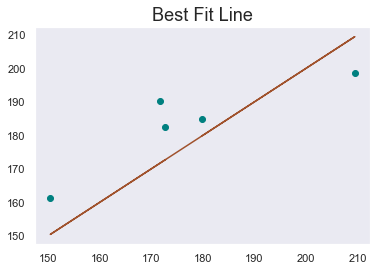

In [61]:
plt.scatter(x=ytest,y=pred,color='teal')
plt.plot(ytest,ytest,color='sienna')
plt.title('Best Fit Line',fontsize=18)

# Saving the model

In [62]:
import joblib
joblib.dump(pred,'home_price_prediction')

['home_price_prediction']

# Loading the model

In [65]:
m = joblib.load("home_price_prediction")

In [66]:
d=pd.DataFrame({'predicted values':pred,'actual values':ytest})

In [67]:
d

,predicted values,actual values
12,182.369949,172.78
2,190.163742,171.73
1,161.437057,150.44
16,198.505783,209.47
4,184.881088,179.91
